In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.exceptions import NotFittedError


In [2]:
from sklearn.metrics import f1_score,recall_score

In [5]:
dataset = pd.read_csv('./content/sample_data/Pima Indians Diabetes Dataset - diabetes.csv')
print(len (dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
zero_values = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
for column in zero_values:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna = True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [7]:
print(dataset['Insulin'])

0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64


In [8]:
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42,test_size = 0.1)



In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [10]:
len(Y)


768

In [11]:
math.sqrt(len(Y_train))

26.28687885618983

In [12]:
knn = KNeighborsClassifier(n_neighbors = 11, p =2, metric = 'euclidean')


In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

For max recall n_neighbours should be 3 and recall is 0.7037037037037037


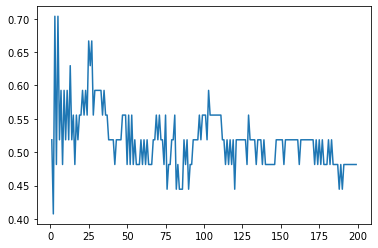

In [18]:
lis=[]
max_recall=0;
max_neigh=0;
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k,p =2, metric = 'euclidean')
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    lis.append(recall_score(Y_test,Y_pred))
    if(max_recall<recall_score(Y_test,Y_pred)):
        max_recall=recall_score(Y_test,Y_pred)
        max_neigh=k

plt.plot(range(1,200),lis)
print("For max recall n_neighbours should be",max_neigh,"and recall is",max_recall)
knn = KNeighborsClassifier(n_neighbors=max_neigh,p =2, metric = 'euclidean')

In [36]:
Y_pred = knn.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[37 13]
 [ 8 19]]


In [38]:
print(f1_score,(Y_test,Y_pred))

<function f1_score at 0x0000020AB85CAC10> (668    0
324    0
624    0
690    0
473    0
      ..
512    0
109    1
587    0
362    0
734    0
Name: Outcome, Length: 77, dtype: int64, array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64))


In [39]:
print(recall_score(Y_test,Y_pred))

0.7037037037037037


In [40]:
pickle.dump(knn, open("../models/KNN.pkl",'wb'))
